## Dataset information
The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli.  Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15.  We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000.  See the article cited above for more details.



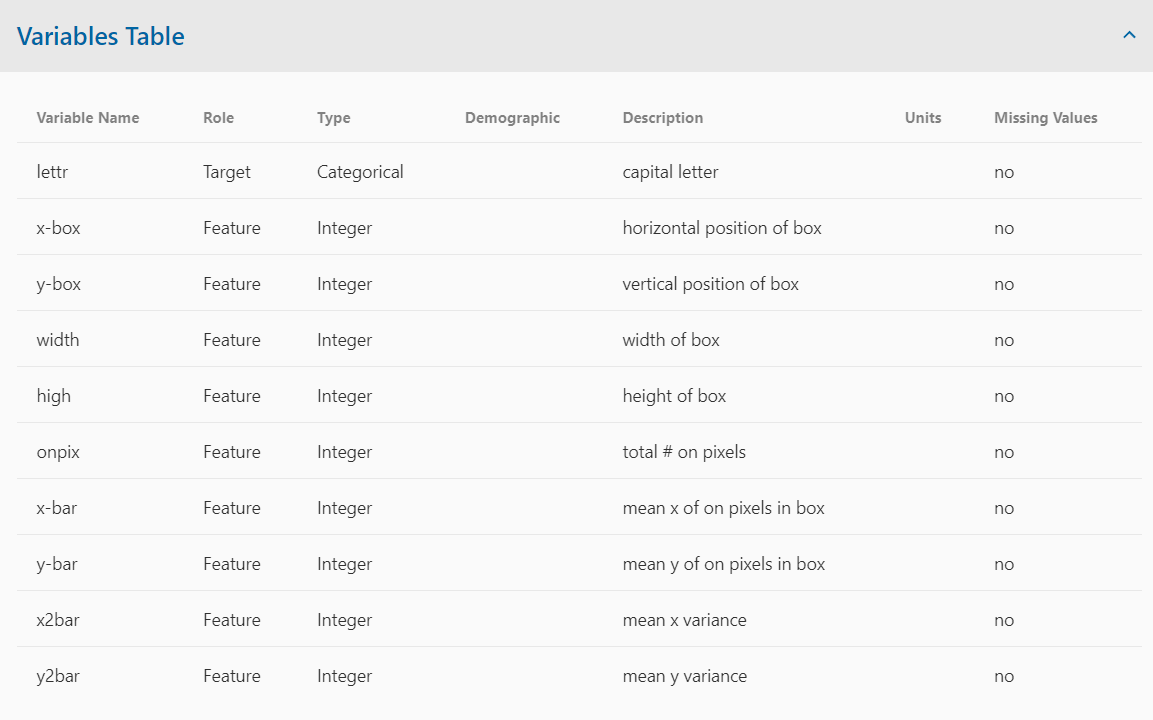

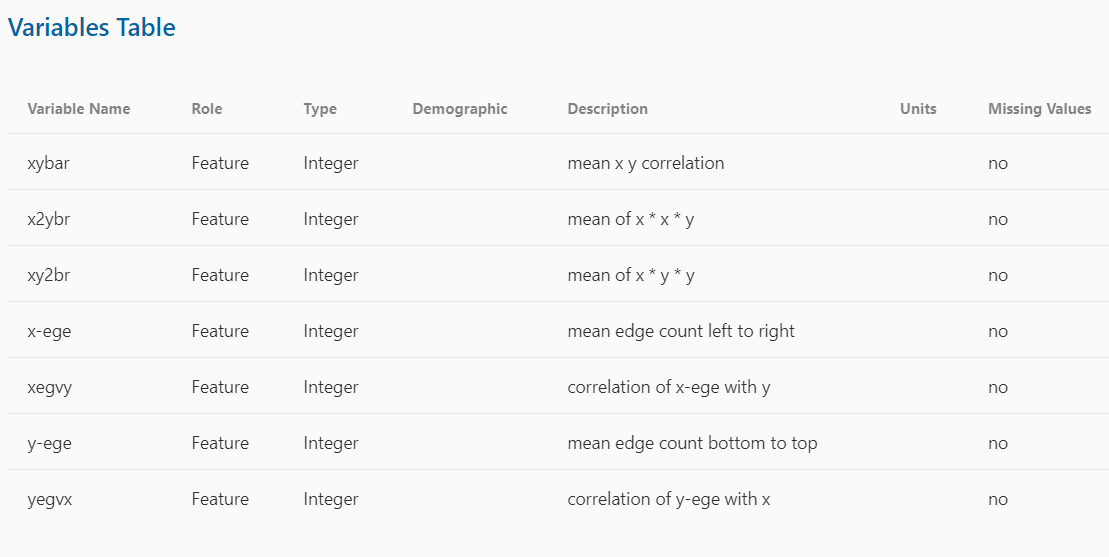

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Download and load the dataset (replace 'your_data_path' with the actual path)
data_path = 'letter-recognition.data'
columns = ['letter'] + [f'feature_{i}' for i in range(16)]
df = pd.read_csv(data_path, names=columns)
# Assuming 'your_data_path' is the actual path to your data file

# Preprocess the data
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['letter'])
X = df.drop(['letter', 'target'], axis=1)
y = df['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.iloc[0]

feature_0      4
feature_1      7
feature_2      5
feature_3      5
feature_4      4
feature_5      6
feature_6      7
feature_7      3
feature_8      7
feature_9     11
feature_10     8
feature_11     9
feature_12     3
feature_13     8
feature_14     4
feature_15     8
Name: 5894, dtype: int64

In [32]:
df.isnull().sum()

letter        0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
target        0
dtype: int64

In [31]:
df.dtypes

letter        object
feature_0      int64
feature_1      int64
feature_2      int64
feature_3      int64
feature_4      int64
feature_5      int64
feature_6      int64
feature_7      int64
feature_8      int64
feature_9      int64
feature_10     int64
feature_11     int64
feature_12     int64
feature_13     int64
feature_14     int64
feature_15     int64
target         int32
dtype: object

In [33]:
# Build the deep neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(16,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))  # 26 classes for letters

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/10
500/500 [==============================] - 4s 5ms/step - loss: 1.6788 - accuracy: 0.5311 - val_loss: 1.0565 - val_accuracy: 0.6995
Epoch 2/10
500/500 [==============================] - 3s 6ms/step - loss: 0.9517 - accuracy: 0.7266 - val_loss: 0.8634 - val_accuracy: 0.7517
Epoch 3/10
500/500 [==============================] - 3s 7ms/step - loss: 0.7839 - accuracy: 0.7695 - val_loss: 0.6914 - val_accuracy: 0.8015
Epoch 4/10
500/500 [==============================] - 3s 7ms/step - loss: 0.6774 - accuracy: 0.7999 - val_loss: 0.6095 - val_accuracy: 0.8200
Epoch 5/10
500/500 [==============================] - 3s 7ms/step - loss: 0.5956 - accuracy: 0.8216 - val_loss: 0.5376 - val_accuracy: 0.8465
Epoch 6/10
500/500 [==============================] - 3s 7ms/step - loss: 0.5253 - accuracy: 0.8426 - val_loss: 0.5108 - val_accuracy: 0.8485
Epoch 7/10
500/500 [==============================] - 3s 7ms/step - loss: 0.4662 - accuracy: 0.8597 - val_loss: 0.4507 - val_accuracy: 0.8633
Epoch 

In [34]:
# Given data
import numpy as np
new_data = np.array([4, 7, 5, 5, 4, 6, 7, 3, 7, 11, 8, 9, 3, 8, 4, 8]).reshape(1, -1)

# Use the model to make predictions
predictions = model.predict(new_data)
print(predictions)
# Display the predictions
predicted_class = np.argmax(predictions)
print(f'The predicted class is: {predicted_class}')


1/1 [==============================] - 0s 117ms/step
[[3.0437626e-08 6.0335838e-05 7.8276871e-04 3.5794519e-03 9.7957247e-01
  7.8349351e-04 8.4436889e-04 3.1322022e-03 5.2407086e-05 2.1034355e-05
  5.4475525e-03 4.1042260e-04 1.5016535e-06 2.6737092e-07 4.1051786e-07
  8.3033447e-06 2.3213875e-08 2.6730811e-06 1.5347229e-03 1.2800363e-03
  2.5265565e-04 5.8221985e-06 3.3386384e-11 2.1321226e-03 3.7167362e-07
  9.4422940e-05]]
The predicted class is: 4


In [35]:
class_mapping = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}

# Display the predicted class using the mapping
predicted_letter = class_mapping[predicted_class]
print(f'The predicted class is: {predicted_class}, which corresponds to the letter: {predicted_letter}')


The predicted class is: 4, which corresponds to the letter: E



prediction = [[3.0437626e-08 6.0335838e-05 7.8276871e-04 3.5794519e-03 9.7957247e-01
  7.8349351e-04 8.4436889e-04 3.1322022e-03 5.2407086e-05 2.1034355e-05
  5.4475525e-03 4.1042260e-04 1.5016535e-06 2.6737092e-07 4.1051786e-07
  8.3033447e-06 2.3213875e-08 2.6730811e-06 1.5347229e-03 1.2800363e-03
  2.5265565e-04 5.8221985e-06 3.3386384e-11 2.1321226e-03 3.7167362e-07
  9.4422940e-05]]

array represents the predicted probabilities for each class in a multiclass classification problem. The array is a result of using a softmax activation function in the output layer of a neural network.

Each element in the array corresponds to the predicted probability of the input belonging to a specific class. In this case, it has 26 classes (corresponding to letters of the alphabet).

The element at index 0 represents the predicted probability for class A.
The element at index 1 represents the predicted probability for class B.
... and so on.
In specific example, the highest predicted probability is at index 4 (0-based indexing), which means the model is predicting class E with high confidence (since the probability is close to 1). The interpretation is that, given the input data, the model believes there is a very high likelihood that the correct class is E.